# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Datasets

In [2]:
athletes = pd.read_csv("athlete_events.csv")
region = pd.read_csv("noc_regions.csv")

In [3]:
#Joinig Two DataFrame
df = athletes.merge(region,how='left',on="NOC")

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [5]:
# Structural information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [6]:
# Statistical information about Dataset
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
# Column Name consistent
df.rename(columns={'region':'Region','notes':'Notes'},inplace=True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


# Checking Null/Missing Values

In [8]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

# Filling Null Values

In [9]:
df.fillna({"Medal":"No_Medal","Height":df["Height"].mean(),"Weight":df["Weight"].mean(),"Age":df.Age.mean()},inplace = True)

# Indian Details in Olympic

In [10]:
df[df["Team"]=="India"].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,25.556898,175.33897,70.702393,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,No_Medal,India,NaN
506,281,S. Abdul Hamid,M,25.556898,175.33897,70.702393,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,No_Medal,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.000000,167.00000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,No_Medal,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.000000,167.00000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,No_Medal,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.000000,167.00000,53.000000,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,No_Medal,India,NaN


# Checking for Top Countries participated in olympics

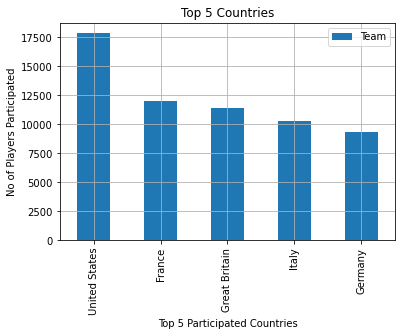

In [11]:
x = df["Team"].value_counts().sort_values(ascending=False).head()
x.plot(kind="bar")
plt.xlabel("Top 5 Participated Countries")
plt.ylabel("No of Players Participated")
plt.title("Top 5 Countries")
plt.grid()
plt.legend()

# Age Distribution of participants in olympics

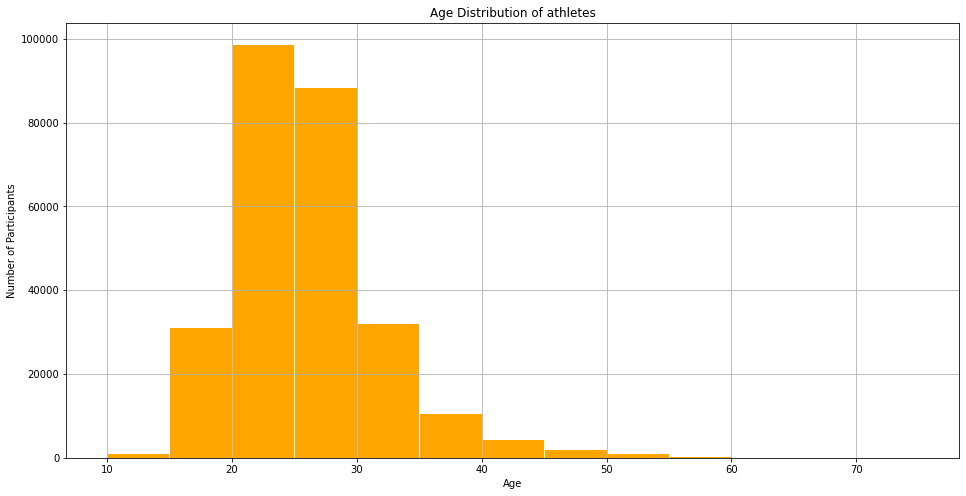

In [12]:
plt.figure(figsize=(16,8))
plt.title("Age Distribution of athletes")
plt.xlabel("Age")
plt.ylabel("Number of Participants")
plt.hist(df["Age"],bins = np.arange(10,80,5),color="orange",edgecolor = "white")
plt.grid()

# Seasonal Distribution of Matches Played

<AxesSubplot:ylabel='Season'>

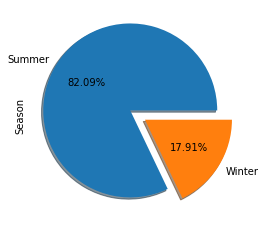

In [13]:
# Percentage of matches played acording to season
df["Season"].value_counts().plot(kind="pie",autopct="%.2f%%",shadow=True,explode=(0.1,0.1))

# Types of sport event that are conducted in olympic

In [14]:
df["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

# Top Most Event that oraganized in olympics

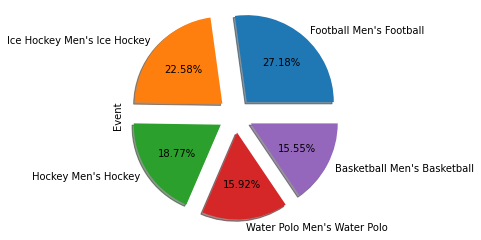

In [15]:
x = df["Event"].value_counts().head().plot(kind="pie",autopct="%.2f%%",shadow=True,explode=(0.2,0.2,0.2,0.2,0.2))

# Total No of Medals

In [16]:
df[df["Medal"]!="No_Medal"]["Medal"].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

# Total Number of female athletes in each olympic year

Text(0.5, 1.0, 'Women Participation')

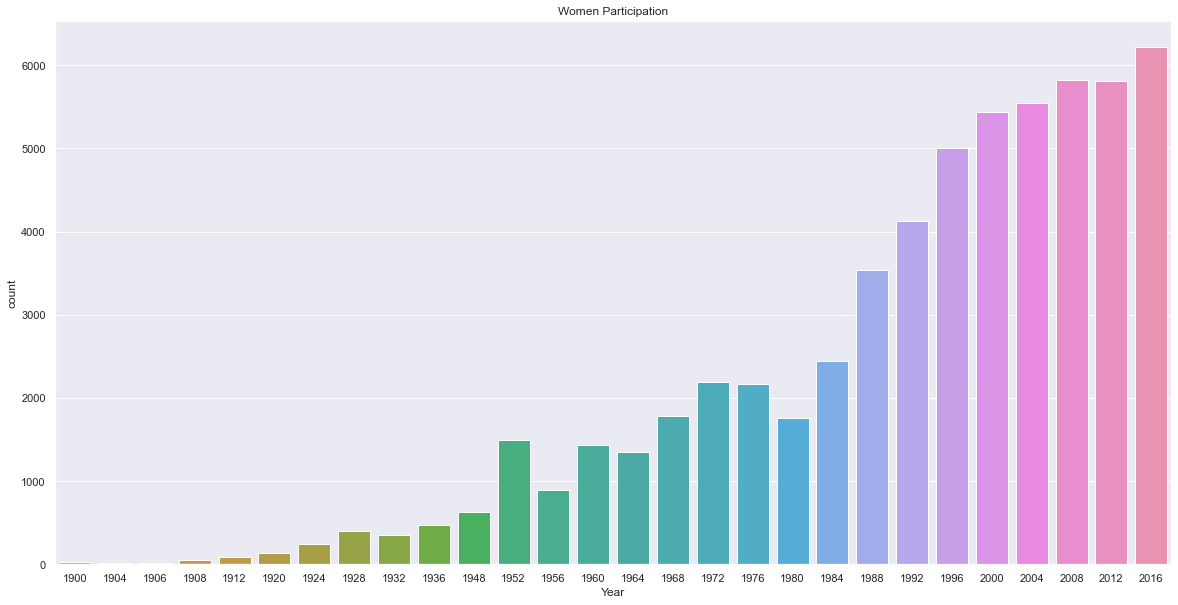

In [17]:
w = df[(df.Sex=="F")&(df.Season=="Summer")]
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x="Year",data=w)
plt.title("Women Participation")


# Total Number of Male athletes in each olympic year

Text(0.5, 1.0, 'Male Participation')

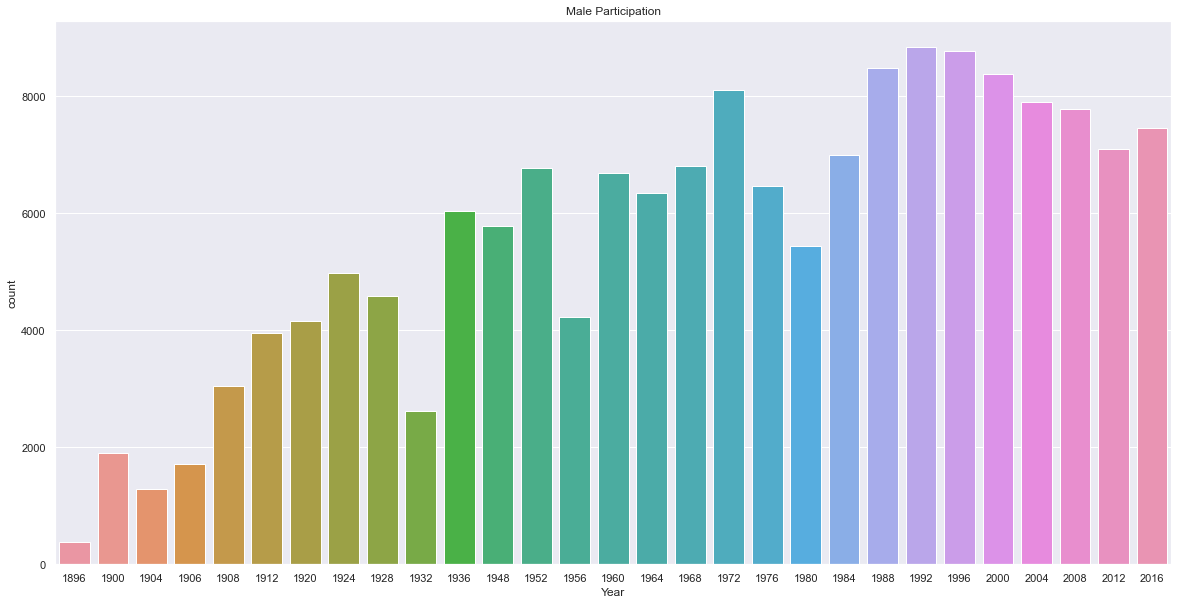

In [18]:
m = df[(df.Sex=="M")&(df.Season=="Summer")]
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x="Year",data=m)
plt.title("Male Participation")

# Top 5 Gold Medal Winner Names

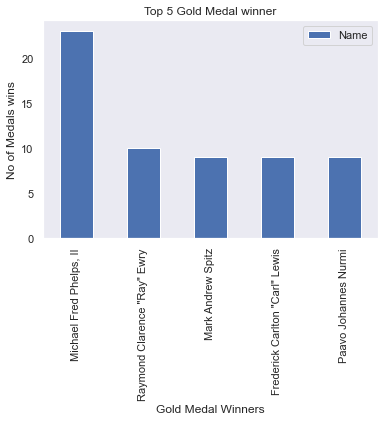

In [19]:
g = df[df["Medal"]=="Gold"]["Name"].value_counts().head().plot(kind="bar")
plt.xlabel("Gold Medal Winners")
plt.ylabel("No of Medals wins")
plt.title("Top 5 Gold Medal winner")
plt.grid()
plt.legend()

# Top 5 Silver Medal Winner Names

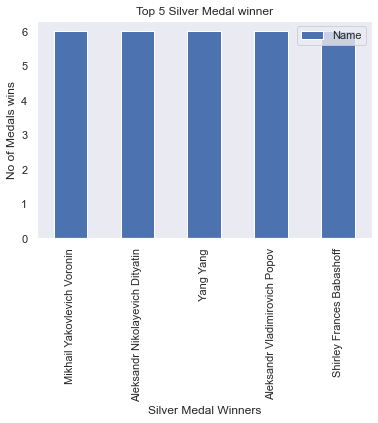

In [20]:
g = df[df["Medal"]=="Silver"]["Name"].value_counts().head().plot(kind="bar")
plt.xlabel("Silver Medal Winners")
plt.ylabel("No of Medals wins")
plt.title("Top 5 Silver Medal winner")
plt.grid()
plt.legend()

# Top 5 Silver Bronze Winner Names

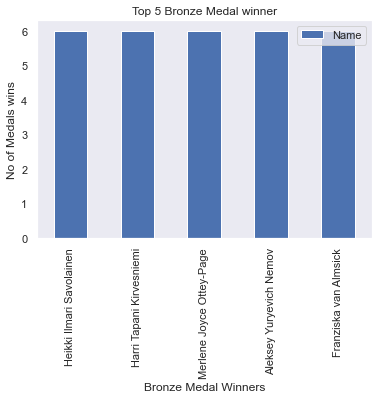

In [21]:
g = df[df["Medal"]=="Bronze"]["Name"].value_counts().head().plot(kind="bar")
plt.xlabel("Bronze Medal Winners")
plt.ylabel("No of Medals wins")
plt.title("Top 5 Bronze Medal winner")
plt.grid()
plt.legend()

# Which Country wins most medals in olympics

<AxesSubplot:ylabel='City'>

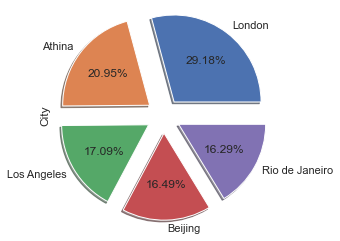

In [22]:
df[df["Medal"]!="No_Medal"]["City"].value_counts().head().plot(kind="pie",autopct="%.2f%%",shadow=True,explode=(0.2,0.2,0.2,0.2,0.2))

# Conclusion



* This Data Represents Olympic Records of diffrent countries
* Misiing Values of dataset are filled-up by fillna() method of pandas.
* This Data Set has 2,71,116 columns & 17 Rows. In this DataSet most of data has object data type
  and remaining data contains numeric and floating data type.
* In Overall Olympic the minimum age of a player is 10 and maximum age is 97. The average age of players in data is 25.
  The Most Participated players in olympic has age group between 19 to 31.
* Names of the top 5 countries participated in olympic is:
  1)United States
  2)France
  3)Great Britain
  4)Italy
  5)Germany.
* The most of olympic mathes played in summer season.
  Ratio is:
  summer = 82%
  winter = 18%
* The Most Organized event in overall olympic is Men's Football till year 2016.
* There are three types of Medals Distributed Among the winners:
  1)Gold
  2)Silver
  3)Bronze
* The Name of players who won most medals:
  1] Gold = Michael fred Plelps,
  2] Silver = Aleksandar Nikolaye vich Dityatin
  3] Bronze = Aleksey Yuryevich Nemow
* Most no of medals have won by the players from london
* After observing graph of male and female participation male is participated more than female.
  The Participation Range of female is increased year-by-year.
  
 
  